<a href="https://colab.research.google.com/github/nehasingh112/ULMFiT_Text_Classification/blob/master/ULMFiT_fastai_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's install PyTorch and fastai libraries first. You have to repeat this step every time you restart this notebook in colab.

# New Section

In [0]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
     |████████████████████████████████| 656.8MB 35kB/s 


In [0]:
# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os

In [0]:
# #import dataset
# from sklearn.datasets import fetch_20newsgroups
# dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
# documents = dataset.data

In [0]:
# dataset.target_names

In [0]:
# create a dataframe
#df = pd.DataFrame({'label':dataset.target,  'text':dataset.data})


In [0]:
#df_train = pd.read_csv('/content/Ellicott_city_flood_2018_labelled.csv', encoding = 'latin-1')
#df_train = pd.read_csv('/Ellicott_labelled414.csv', encoding = 'Latin-1')
#df_test = pd.read_csv('/EC_tweets_test.csv', encoding = 'Latin-1')
df_train = pd.read_csv('/EC_tweets_test.csv', encoding = 'Latin-1')
#df_train = pd.read_csv('/content/queensland_train.csv')
#df_test = pd.read_csv('/content/Alberta_test.csv')
#df_train = pd.read_csv('/content/Sardinia_colorado_floods_2013.csv')
#df_test = pd.read_csv('/content/ellicott_test.csv', encoding ='Latin-1')
#df_train = pd.read_csv('/content/Sardinia_train.csv')
#df_test = pd.read_csv('/content/colorado_test.csv')

# New Section

In [286]:
df_train.shape#, #df_test.shape

(148, 2)

In [0]:
# df = df[df['label'].isin([1,10])]
# df = df.reset_index(drop = True)

In [243]:
print(df_train['Labels'].value_counts())
#df_test['label'].value_counts()

Unrelated    81
Related      67
Name: Labels, dtype: int64


### Preprocessing

In [0]:
df_train['Tweets'] = df_train['Tweets'].str.replace("[^a-zA-Z]", " ")
#df_train['tweet'] = df_train['tweet'].str.replace("[^a-zA-Z]", " ")
df_test['Tweets'] = df_test['Tweets'].str.replace("[^a-zA-Z]", " ")
#df_test['tweet'] = df_test['tweet'].str.replace("[^a-zA-Z]", " ")

In [0]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', '')
    ReviewText = ReviewText.str.replace('(http)', '')
    ReviewText = ReviewText.str.replace('(co)', '')
    ReviewText = ReviewText.str.replace('(rt)', '')
    ReviewText = ReviewText.str.replace('[^\w\s]', '')
   
    return ReviewText
df_train['Tweets'] = preprocess(df_train['Tweets'])    
#df_train['tweet'] = preprocess(df_train['tweet'])
df_test['Tweets'] = preprocess(df_test['Tweets'])

In [0]:
df_train= df_train[['label','tweet']] 

In [0]:
df_train.head(),df_test.head()

(      Labels                                             Tweets
 0  Unrelated  Making plans for  MemorialDay in the New Orlea...
 1  Unrelated  Flash flood Warning for Tuscarawas  amp  Carro...
 2  Unrelated  Flash Flood Warning including Millersburg OH  ...
 3  Unrelated  NEW  Flash Flood Warning for Holmes County unt...
 4  Unrelated  From StormTracker    Flash Flood Warning for K...,
       Labels                                             Tweets
 0  Unrelated  This velcro cuddler needs home currently MD ch...
 1  Unrelated  RT tinahorncae Quoting Jen Mallo     You     p...
 2  Unrelated  Quoting Jen Mallo     You     pa problem pa so...
 3  Unrelated  RT stteblog HoCo Families Education Improvemen...
 4    Related                       Rain really ming Ellitt City)

In [289]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english') 

In [0]:
# tokenization of training set
tokenized_doc = df_train['Tweets'].apply(lambda x: x.split())

#tokenized_doc = df_train['tweet'].apply(lambda x: x.split())


# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words]) 

# de-tokenization 
detokenized_doc = [] 
for i in range(len(df_train)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 
#df_train['tweet'] = detokenized_doc
df_train['Tweets'] = detokenized_doc

In [0]:
# tokenization of testing set
tokenized_doc = df_test['Tweets'].apply(lambda x: x.split())

# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words]) 

# de-tokenization 
detokenized_doc = [] 
for i in range(len(df_test)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 
df_test['Tweets'] = detokenized_doc

In [0]:
df_train = df_train.append(df_test, ignore_index = True) 

In [0]:
df_train.shape

(413, 2)

In [0]:
 df_train['Labels'].value_counts()

Related      251
Unrelated    162
Name: Labels, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

# split data into training and validation set
#df_trn, df_val = train_test_split(df, stratify = df['label'], test_size = 0.3, random_state = 11)
# split data into training and validation set
df_train1, df_test1 = train_test_split(df_train, stratify = df_train['Labels'], test_size = 0.25, random_state = 1)

In [0]:
df_train1= df_train.sample(frac=0.5, replace=False, random_state=1)

In [331]:
df_train1.shape, df_test1.shape


((111, 2), (37, 2))

In [0]:
df_train1.shape, df_train1['label'].value_counts()

((412, 2), Related      238
 Unrelated    174
 Name: label, dtype: int64)

In [0]:
df_train.shape, df_test.shape

((413, 2), (148, 2))

In [0]:
df_train1= df_train1[['label','tweet']] 

In [332]:
df_test1.shape, df_test1.head(), df_train1.head()

((37, 2),         Labels                                             Tweets
 105  Unrelated  I looking buyer BEAN RD Ridge MD realestate CG...
 12   Unrelated  Hobsons Choice Lane Ellitt City MD new price S...
 11   Unrelated  A new study WalletHub nfirmed already knew Our...
 69     Related  Tiber tributary behind apt Old Ellitt City sti...
 136  Unrelated  Murphy Labrador Retriever MD needs home See Bk...,         Labels                                             Tweets
 100  Unrelated  Staing weekend right Pan Seared Tuna new Weeke...
 31   Unrelated  Charming BD BA ELLICOTT CITY lot offer Call te...
 72     Related  Radar rainfall estimates run high Montgomery C...
 76     Related  Earlier evening extreme weather came Howard Co...
 7    Unrelated  RT atomic trivia Yesterday asked What happened...)

### Data Preparation

In [333]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_train1, valid_df = df_test1, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_train1, valid_df = df_test1, vocab=data_lm.train_ds.vocab, bs=32)

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=True , drop_mult=0.7)

In [335]:
# train the learner object
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.437647,3.652991,0.377679,00:00
1,4.428668,3.629534,0.379911,00:00


In [336]:
#fine-tuning the language model

#learn.save('mini_train_lm')
#learn.save_encoder('mini_train_encoder')
#learn = text_classifier_learner(data_clas, AWD_LSTM)
#learn.load_encoder('mini_train_encoder')
learn.fit_one_cycle(2, slice(1e-3,1e-2))
learn.save('mini_train_clas')

epoch,train_loss,valid_loss,accuracy,time
0,4.410670,3.605664,0.381473,00:00
1,4.386220,3.378471,0.402902,00:00


In [0]:
#  learn.unfreeze()
#  learn.fit_one_cycle(1, 1e-3)
#  learn.freeze_to(-3)
#  learn.fit_one_cycle(1, slice(5e-5/2., 7e-6))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


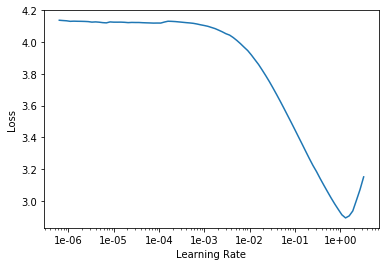

In [337]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save_encoder('ft_enc')

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM,drop_mult=0.7)
learn.load_encoder('ft_enc')

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM,drop_mult=0.5)
learn.load_encoder('mini_train_clas')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


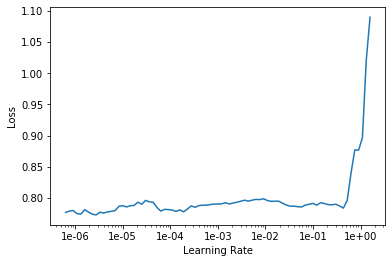

In [341]:
learn.lr_find()
learn.recorder.plot()

In [342]:
learn.fit_one_cycle(1, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.996741,0.794229,0.459459,00:00


In [343]:
#We’ll fine-tune the classifier with gradual unfreezing:
learn.fit_one_cycle(cyc_len=1, max_lr=1e-1, moms=(0.8, 0.7))
learn.freeze_to(-2)
learn.fit_one_cycle(3, slice(1e-2,1e-1), moms=(0.8,0.7))
learn.freeze_to(-3)
learn.fit_one_cycle(4, slice(1e-3,5e-2), moms=(0.8,0.7))
learn.unfreeze()
learn.fit_one_cycle(19, slice(1e-4,1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.112808,0.825099,0.459459,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.938609,1.768162,0.459459,00:00
1,1.084692,0.721101,0.540541,00:00
2,0.984800,0.691860,0.540541,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.729607,0.691166,0.486486,00:00
1,0.770970,0.682583,0.540541,00:00
2,0.734633,0.694999,0.540541,00:00
3,0.739856,0.672862,0.540541,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.680826,0.665123,0.540541,00:00
1,0.702474,0.655030,0.621622,00:00
2,0.685981,0.648065,0.621622,00:00
3,0.704392,0.634489,0.621622,00:00
4,0.704996,0.620904,0.648649,00:00
5,0.688771,0.609226,0.675676,00:00
6,0.676496,0.600144,0.729730,00:00
7,0.653837,0.599893,0.702703,00:00
8,0.645208,0.601948,0.621622,00:00
9,0.639257,0.587516,0.729730,00:00


In [328]:
learn.fit_one_cycle(cyc_len=1, max_lr=1e-01, moms=(0.8, 0.7))
learn.freeze_to(-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.259552,56.932766,0.466667,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


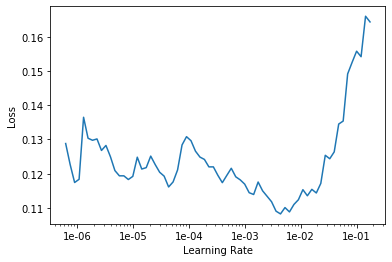

In [261]:
learn.lr_find()
learn.recorder.plot()

In [344]:
learn.predict(" what the flooding dance performance")

(Category Related, tensor(0), tensor([0.7000, 0.3000]))

In [345]:
preds, targets = learn.get_preds()

predictions = np.argmax(preds, axis = 1)
pd.crosstab(predictions, targets)

col_0,0,1
row_0,,
0,12,6
1,5,14


In [346]:
from sklearn.metrics import classification_report

#classification_report(df_test['label'], predictions )
classification_report(targets, predictions )

'              precision    recall  f1-score   support\n\n           0       0.67      0.71      0.69        17\n           1       0.74      0.70      0.72        20\n\n    accuracy                           0.70        37\n   macro avg       0.70      0.70      0.70        37\nweighted avg       0.70      0.70      0.70        37\n'

In [265]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(targets, predictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.86


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.91')

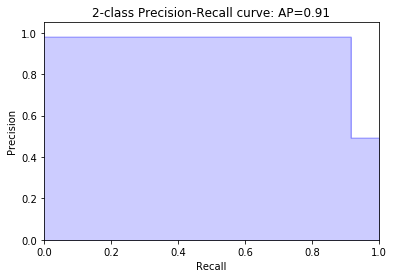

In [0]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(predictions, targets)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [0]:
fro  sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.inverse_transform([0])

NotFittedError: ignored

In [0]:
list(le.classes_)

AttributeError: ignored

     precision    recall  f1-score   support
     \n\n
   0       0.97      0.44      0.61      5189
   \n  
   1       0.62      0.99      0.76      4842
   \n\n   
   accuracy                           0.71     10031
   \n 
   macro avg       0.80      0.72      0.69     10031
   \n
   weighted avg       0.80      0.71      0.68     10031
   \n'

In [0]:
#Provides an interpretation of classification based on input sensitivity. This was designed for AWD-LSTM only for the moment, because Transformer already has its own attentional model.
#The darker the word-shading in the below example, the more it contributes to the classification. Results here are without any fitting. After fitting to acceptable accuracy,
#this class can show you what is being used to produce the classification of a particular case.
import matplotlib.cm as cm
txt_ci =TextClassificationInterpretation.from_learner(learn)
test_text = "There is a lot of water flowing everywhre and people are scared"
txt_ci.show_intrinsic_attention(test_text,cmap=cm.Purples)

In [218]:
learn = language_model_learner(data_lm, AWD_LSTM)
learn.fit_one_cycle(2, 1e-2)
learn.save('mini_train_lm')
learn.save_encoder('mini_train_encoder')

epoch,train_loss,valid_loss,accuracy,time
0,4.858669,3.349524,0.416518,00:00
1,4.488216,3.198010,0.424554,00:00


In [219]:
learn = language_model_learner(data_lm, AWD_LSTM)
learn.fit_one_cycle(2, 1e-2)
learn.save('mini_train_lm')
learn.save_encoder('mini_train_encoder')
learn = text_classifier_learner(data_clas, AWD_LSTM)
learn.load_encoder('mini_train_encoder')
learn.fit_one_cycle(2, slice(1e-3,1e-2))
learn.save('mini_train_clas')

epoch,train_loss,valid_loss,accuracy,time
0,4.756782,3.337329,0.418080,00:00
1,4.427958,3.189210,0.429464,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.772003,0.670384,0.587838,00:00
1,0.712934,0.732384,0.445946,00:00


In [0]:
#interpret
interp = TextClassificationInterpretation.from_learner(learn) 
interp.show_intrinsic_attention("news a xxmaj government xxmaj alberta call centre place answer questions residents affected flooding xmaj residents cal	", cmap=cm.Purples)

In [0]:
txt_ci.show_top_losses(5)

NameError: ignored

# Model comparision

In [0]:

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from keras.preprocessing import text, sequence
from sklearn.feature_extraction.text import CountVectorizer


In [0]:
sentences_train = df_train1['Tweets']
sentences_test = df_test1['Tweets']
y_train = df_train1['Labels']
y_test = df_test1['Labels']

In [0]:
sentences_train, sentences_test, y_train, y_test = train_test_split(tweets, y, test_size=0.25, random_state=1000)

In [0]:
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
#y_test = encoder.fit_transform(y_test)
#y_test

# Baseline Model

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

#to see the vocab
#vectorizer.vocabulary_
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
#X_train.toarray()

In [360]:
X_train

<111x926 sparse matrix of type '<class 'numpy.int64'>'
	with 1452 stored elements in Compressed Sparse Row format>

In [0]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)


In [0]:
predictions = classifier.predict(X_test)

In [363]:
#from sklearn.metrics import classification_report 

print("Accuracy:", score)

print("Report:", classification_report(predictions, y_test))

Accuracy: 0.8378378378378378
Report:               precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.80      0.89      0.84        18

    accuracy                           0.84        37
   macro avg       0.84      0.84      0.84        37
weighted avg       0.84      0.84      0.84        37



without cleaning the data

for CrisisLex flood data: Accuracy: 0.951720986902

for Ellicot city 376 labelled tweets: Accuracy: 0.863157894737

In [138]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

#to see the vocab
#vectorizer.vocabulary_
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train.toarray()

array([[0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0]])

In [0]:
X_train

<10033x11276 sparse matrix of type '<class 'numpy.int64'>'
	with 127820 stored elements in Compressed Sparse Row format>

In [0]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)


In [92]:
classifier.predict(X_train)

array([1, 1, 1, 1, ..., 1, 1, 1, 1])

In [139]:
print("Accuracy:", score)
print("Report" , metrics.classification_report(predictions, y_test))

Accuracy: 0.7228915662650602
Report               precision    recall  f1-score   support

           0       0.82      0.76      0.79        54
           1       0.61      0.69      0.65        29

    accuracy                           0.73        83
   macro avg       0.71      0.72      0.72        83
weighted avg       0.75      0.73      0.74        83



without cleaning the data

for CrisisLex flood data: Accuracy: 0.951720986902

for Ellicot city 376 labelled tweets: Accuracy: 0.863157894737

# Simple Keras Model for deep learning

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras import layers


In [0]:

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [141]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                17950     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 17,961
Trainable params: 17,961
Non-trainable params: 0
_________________________________________________________________


In [0]:
import keras.callbacks
#saving the model at regular epoch interval
checkpoint = keras.callbacks.ModelCheckpoint('./basic_keras'+'-{epoch:02d}-{val_acc:.2f}.hdf5',
                                            monitor = 'val_loss',
                                            verbose=1,
                                            save_best_only=False,
                                            save_weights_only=False,
                                            mode='auto',
                                            period=10)

In [0]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=100)

In [0]:
# after fitting the model
#saving the model to continue later
model.save('./basic_keras.hdf5')

In [146]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Report" , metrics.classification_report(predictions, y_test))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000


ValueError: ignored

In [0]:
predictions=model.predict(X_train)


In [103]:
model.predict_classes(X_train)

array([[1],
       [1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [104]:
min(model.predict(X_train))

array([0.001294], dtype=float32)

In [105]:
max(model.predict(X_train))

array([0.998791], dtype=float32)

In [0]:
import matplotlib.pyplot as plt
#plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

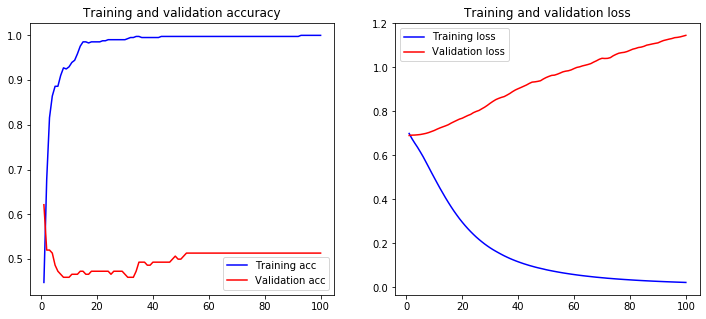

In [107]:
plot_history(history)

In [0]:
# loading the model which is already trained with trained parameters
from keras.models import load_model
model = load_model('./basic_keras.hdf5')

# Using Word Embedding layer of keras for this text classification problem

In [0]:
# instead of using countvectorizer of sklearn vector encoding we will be using word embedding of keras
#mainly 2 ways
# 1: train your word embedding with the training data
# 2: use the pretrained word embedding such as glove, word2vec etc

from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words= 5000)
tokenizer.fit_on_texts(sentences_train)
#X_train = keras.preprocessing.text.text_to_word_sequence(sentences_train,  filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
#X_test = keras.preprocessing.text.text_to_word_sequence(sentences_test,  filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
#vocab_size = len(tokenizer.word_index) + 1 # 1 added extra for reserved 0 index
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1 # 1 added extra for reserved 0 index
#keras.preprocessing.text.text_to_word_sequence

In [0]:
vocab_size

11303

In [0]:
#print out the xtrain and xtest
print(sentences_train[2])
print(X_train[2])

craig thompson to be extradited to victoria on fraud charges oh to be on the plane with him in handcuffs auspol
[3669, 3670, 5, 30, 5, 681, 19, 3671, 218, 5, 30, 19, 2, 1553, 25, 267, 3, 362]


In [0]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
X_train =pad_sequences(X_train, padding = 'post', maxlen = maxlen)
X_test = pad_sequences(X_test, padding = 'post', maxlen= maxlen)


In [0]:
X_train[2]

array([ 883, 1108,  184, 1054,   13,  122,   93,   96,    8,  370,   13,
         23,  559,  267,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [0]:
from keras.models import Sequential
from keras import layers
embedding_dim = 50
model = Sequential()
model.add(layers.Embedding(input_dim = vocab_size,
                          output_dim = embedding_dim,
                          input_length = maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           565150    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 615,171
Trainable params: 615,171
Non-trainable params: 0
_________________________________________________________________


In [0]:
import numpy as np
history = model.fit(np.array(X_train), np.array(y_train),
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=100)


In [0]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test,verbose=False)
print("Testing accuracy: {:.4f}".format(accuracy))



Training accuracy: 0.9941
Testing accuracy: 0.7698


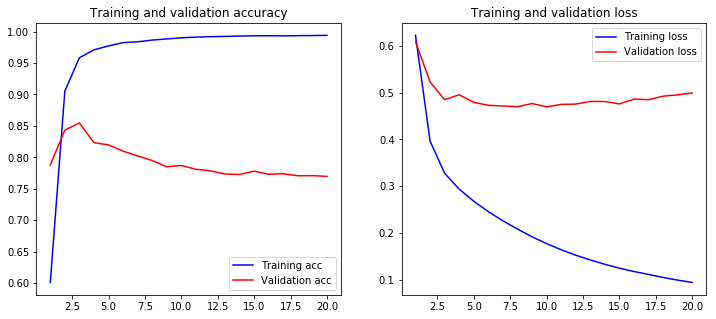

In [0]:
plot_history(history)

In [0]:
# using maxpooling/avgpooling1D or globalpooling/globalaveragepooling1D layer after embedding layer do the downsampling 
# of the the word embedding layers. reducing the size of the incoming feature vectors
# gloab max/avg pooling takes the max or avg of all feature whereas in other case we have to define the pool size
# keras has its own layer to do this
from keras.models import Sequential
from keras import layers
embedding_dim=50
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                          output_dim=embedding_dim,
                          input_length=maxlen))
model.add(layers.GlobalAvgPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
             loss= 'binary_crossentropy',
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           565150    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 565,671
Trainable params: 565,671
Non-trainable params: 0
_________________________________________________________________


Training accurac: 0.9875
Testing accuracy: 0.7416


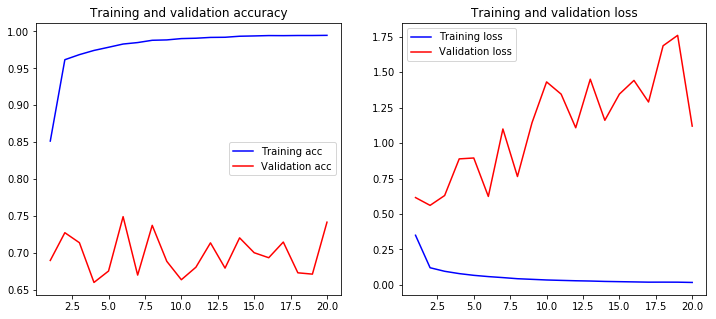

In [0]:
history = model.fit(np.array(X_train), np.array(y_train),
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training accurac: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test,verbose=False)
print("Testing accuracy: {:.4f}".format(accuracy))
plot_history(history)



# Using Word Embedding layer of keras for this text classification problem

In [0]:
# instead of using countvectorizer of sklearn vector encoding we will be using word embedding of keras
#mainly 2 ways
# 1: train your word embedding with the training data
# 2: use the pretrained word embedding such as glove, word2vec etc

from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words= 5000)
tokenizer.fit_on_texts(sentences_train)
#X_train = keras.preprocessing.text.text_to_word_sequence(sentences_train,  filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
#X_test = keras.preprocessing.text.text_to_word_sequence(sentences_test,  filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
#vocab_size = len(tokenizer.word_index) + 1 # 1 added extra for reserved 0 index
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1 # 1 added extra for reserved 0 index
#keras.preprocessing.text.text_to_word_sequence

In [109]:
vocab_size

2137

In [110]:
#print out the xtrain and xtest
print(sentences_train[2])
print(X_train[2])

Flash Flood Warning including Millersburg OH Berlin OH Walnut Creek OH PM EDT https co JtR utP V
[4, 3, 5, 63, 326, 57, 583, 57, 584, 222, 57, 7, 8, 2, 1, 585, 586, 132]


In [0]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
X_train =pad_sequences(X_train, padding = 'post', maxlen = maxlen)
X_test = pad_sequences(X_test, padding = 'post', maxlen= maxlen)


In [112]:
X_train[2]

array([ 4,  3,  5, 63, ...,  0,  0,  0,  0], dtype=int32)

In [113]:
from keras.models import Sequential
from keras import layers
embedding_dim = 50
model = Sequential()
model.add(layers.Embedding(input_dim = vocab_size,
                          output_dim = embedding_dim,
                          input_length = maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           106850    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 156,871
Trainable params: 156,871
Non-trainable params: 0
_________________________________________________________________


In [0]:
import numpy as np
history = model.fit(np.array(X_train), np.array(y_train),
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=100)


In [115]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test,verbose=False)
print("Testing accuracy: {:.4f}".format(accuracy))



Training accuracy: 0.9952
Testing accuracy: 0.4324


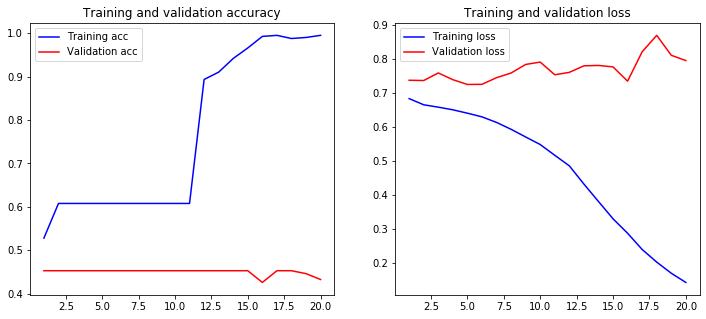

In [116]:
plot_history(history)

In [117]:
# using maxpooling/avgpooling1D or globalpooling/globalaveragepooling1D layer after embedding layer do the downsampling 
# of the the word embedding layers. reducing the size of the incoming feature vectors
# gloab max/avg pooling takes the max or avg of all feature whereas in other case we have to define the pool size
# keras has its own layer to do this
from keras.models import Sequential
from keras import layers
embedding_dim=50
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                          output_dim=embedding_dim,
                          input_length=maxlen))
model.add(layers.GlobalAvgPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
             loss= 'binary_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           106850    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 107,371
Trainable params: 107,371
Non-trainable params: 0
_________________________________________________________________


Training accurac: 0.9806
Testing accuracy: 0.4527


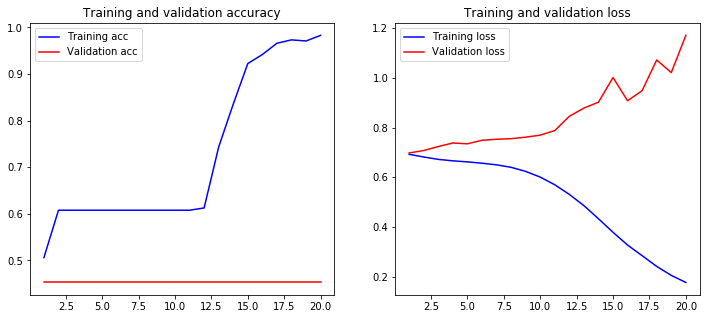

In [118]:
history = model.fit(np.array(X_train), np.array(y_train),
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training accurac: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test,verbose=False)
print("Testing accuracy: {:.4f}".format(accuracy))
plot_history(history)



# using pre-trained word embedding

In [0]:
#most popular among all; 
#glove by stanford NLP group: co-occurance matric and by matric factorization 
#word2vec: by google: employ neural network

#tranforming the glove word embedding to the embedding atrix format
import numpy as np
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1 # adding 1 because of reserved 1 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    
    with open(filepath,encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(vector, dtype =np.float32)[:embedding_dim]
    
    return embedding_matrix


In [0]:
embedding_dim= 50
embedding_matrix = create_embedding_matrix('/glove.6B.50d.txt',
                                           tokenizer.word_index, embedding_dim)

In [122]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis = 1))
nonzero_elements/vocab_size
# checking how many of the embedding vectors are npn zero
# in this case 74% of the vobulary is covered by the pretrained model

0.5255030416471689

In [123]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights= [embedding_matrix],
                           input_length = maxlen,
                          trainable =False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           106850    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 107,371
Trainable params: 521
Non-trainable params: 106,850
_________________________________________________________________


Training accurac: 0.7046
Training accurac: 0.4730


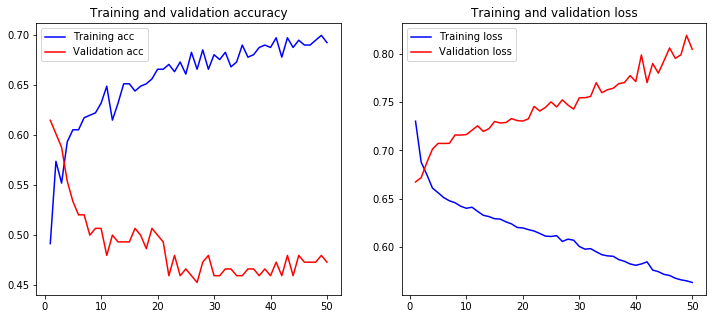

In [124]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=20)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training accurac: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test,verbose=False)
print("Training accurac: {:.4f}".format(accuracy))
plot_history(history)


In [125]:
# we can train the embedding by setting the parameter trainable= true
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights= [embedding_matrix],
                           input_length = maxlen,
                           trainable =True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           106850    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 107,371
Trainable params: 107,371
Non-trainable params: 0
_________________________________________________________________


Training accuracy: 0.9903
Testing accuracy: 0.4189


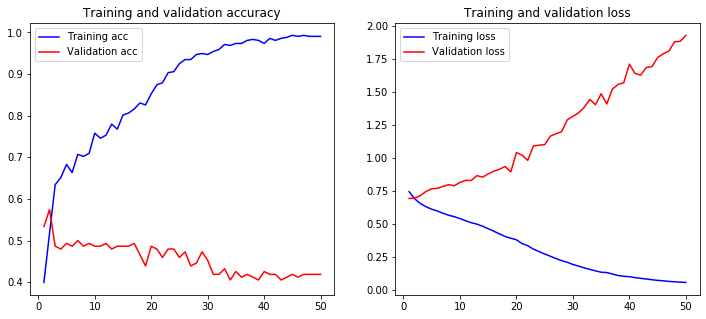

In [126]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=20)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test,verbose=False)
print("Testing accuracy: {:.4f}".format(accuracy))
plot_history(history)


In [0]:
# word embedding
#from gensim.models import Word2Vec
import gensim.models.keyedvectors as word2vec
model = word2vec.KeyedVectors.load_word2vec_format('C:/Users/nehas/Google Drive/PHD IS/percom2019/GoogleNews-vectors-negative300.bin'
                                                       , binary=True)